In [1]:
# Import relevant libraries:
import json
import csv
import pandas as pd 
import numpy as np #linear algebra
import gc #garbage collection - keep track of objects in memory
import re #regular expressions

#plotting
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('display.max_columns', None)

In [63]:
def null(dataframe): #generate null count summary by descending number
    null_df = pd.DataFrame(dataframe.isnull().sum()).reset_index() #count null values
    null_df = null_df.rename(columns={'index':'colnames', 0:'null'})
    null_df['null_ratio%'] = round(null_df['null']/dataframe.shape[0]*100, 4) #calculate null ratio
    null_df = null_df.sort_values(by='null_ratio%', ascending=False)
    return null_df

## Restaurants in PA and FL Data (Subset from EDA):

In [64]:
#### SUBSETTING 
restaurants_reduced_DF = pd.read_csv("restaurants_reduced.csv", sep=',', header=0)
restaurants_reduced_DF

,business_id,business_name,city,state,postal_code,stars,categories,review_count,attributes
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,19107.0,4.0,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",80,"{'RestaurantsDelivery': 'False', 'OutdoorSeati..."
1,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,Tampa Bay,FL,33602.0,4.0,"Vietnamese, Food, Restaurants, Food Trucks",10,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'..."
2,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,Philadelphia,PA,19106.0,4.0,"Sushi Bars, Restaurants, Japanese",245,"{'RestaurantsReservations': 'True', 'Restauran..."
3,ROeacJQwBeh05Rqg7F6TCg,BAP,Philadelphia,PA,19147.0,4.5,"Korean, Restaurants",205,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d..."
4,kV_Q1oqis8Qli8dUoGpTyQ,Ardmore Pizza,Ardmore,PA,19003.0,3.5,"Pizza, Restaurants",109,"{'RestaurantsGoodForGroups': 'True', 'WiFi': ""..."
...,...,...,...,...,...,...,...,...,...
13988,esBGrrmuZzSiECyRBoKvvA,Colony Grill - St. Petersburg,St. Petersburg,FL,33701.0,4.5,"Bars, Beer Bar, Nightlife, Wine Bars, Pizza, R...",38,"{'RestaurantsPriceRange2': '2', 'RestaurantsAt..."
13989,Wko0HNelt55ZIp3Dm3eD2g,Swiss Farms Store,Springfield,PA,19064.0,3.5,"Convenience Stores, Sandwiches, Restaurants, F...",5,"{'RestaurantsPriceRange2': '2', 'BusinessAccep..."
13990,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,Philadelphia,PA,19128.0,3.0,"Restaurants, Specialty Food, Food, Sandwiches,...",55,"{'NoiseLevel': ""u'average'"", 'RestaurantsTakeO..."
13991,l9eLGG9ZKpLJzboZq-9LRQ,Wawa,Clifton Heights,PA,19018.0,3.0,"Restaurants, Sandwiches, Convenience Stores, C...",11,"{'BikeParking': 'True', 'BusinessAcceptsCredit..."


In [65]:
# check data types:
restaurants_reduced_DF.info() # re-run after processing nulls and change data type of zipcode below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13993 entries, 0 to 13992
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   business_id    13993 non-null  object 
 1   business_name  13993 non-null  object 
 2   city           13993 non-null  object 
 3   state          13993 non-null  object 
 4   postal_code    13992 non-null  float64
 5   stars          13993 non-null  float64
 6   categories     13993 non-null  object 
 7   review_count   13993 non-null  int64  
 8   attributes     13845 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 984.0+ KB


In [66]:
# check number of null values:
null(restaurants_reduced_DF) # re-run after processing nulls and change data type of zipcode below

,colnames,null,null_ratio%
8,attributes,148,1.0577
4,postal_code,1,0.0071
0,business_id,0,0.0000
1,business_name,0,0.0000
2,city,0,0.0000
3,state,0,0.0000
5,stars,0,0.0000
6,categories,0,0.0000
7,review_count,0,0.0000


In [67]:
restaurants_reduced_DF.dropna(axis=0, inplace=True) # dropping null values to avoid errors

In [68]:
# postal_code values are in float; convert postal_code to 'object' type:
restaurants_reduced_DF['postal_code'] = restaurants_reduced_DF['postal_code'].astype(int).astype(str)

In [69]:
unique_zipcode = restaurants_reduced_DF['postal_code'].unique() #a numpy array of all unique postal codes in the data
unique_zipcode.size #number of unique zip codes

355

## Income Data (from Census):

In [2]:
income_DF = pd.read_csv("income data.csv", sep=',', header=0)
income_DF

,Geographic Area Name,Estimate!!Households!!Total,Estimate!!Households!!Mean income (dollars)
0,ZCTA5 32003,11093,119164
1,ZCTA5 32008,2123,47901
2,ZCTA5 32009,1384,78698
3,ZCTA5 32011,5318,73333
4,ZCTA5 32024,7016,75984
...,...,...,...
2776,ZCTA5 19607,9190,86165
2777,ZCTA5 19608,8611,115862
2778,ZCTA5 19609,3928,93282
2779,ZCTA5 19610,6555,119779


In [3]:
income_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2781 entries, 0 to 2780
Data columns (total 3 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Geographic Area Name                         2781 non-null   object
 1   Estimate!!Households!!Total                  2781 non-null   int64 
 2   Estimate!!Households!!Mean income (dollars)  2781 non-null   object
dtypes: int64(1), object(2)
memory usage: 65.3+ KB


In [72]:
# rename mean columns to be shorter and easier to understand:
income_DF.rename({"Geographic Area Name": "full_zip_code",
                    "Estimate!!Households!!Mean income (dollars)": "avg_income",
                    "Estimate!!Households!!Total": "total_hh"}, axis = "columns", inplace = True) 
income_DF

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Geographic Area Name,total_hh,avg_income
0,ZCTA5 32003,11093,119164
1,ZCTA5 32008,2123,47901
2,ZCTA5 32009,1384,78698
3,ZCTA5 32011,5318,73333
4,ZCTA5 32024,7016,75984
...,...,...,...
2776,ZCTA5 19607,9190,86165
2777,ZCTA5 19608,8611,115862
2778,ZCTA5 19609,3928,93282
2779,ZCTA5 19610,6555,119779


In [73]:
income_DF[(income_DF["avg_income"] == '-') | (income_DF["avg_income"] == 'N')] #find rows where avg_income is not a number (106 rows total)
                                                                            #not dropping them at the moment; drop after merged instead!

,Geographic Area Name,total_hh,avg_income
6,ZCTA5 32026,0,-
60,ZCTA5 32133,0,-
109,ZCTA5 32228,0,-
155,ZCTA5 32356,0,-
159,ZCTA5 32399,0,-
...,...,...,...
2726,ZCTA5 19477,0,-
2739,ZCTA5 19519,69,N
2742,ZCTA5 19523,62,N
2749,ZCTA5 19535,6,N


In [81]:
# Descriptive statistics
non_null = income_DF[(income_DF["avg_income"] != '-') & (income_DF["avg_income"] != 'N')]
non_null['avg_income'] = non_null['avg_income'].astype(int)
non_null.describe()


/var/folders/ts/j11wcldj74b9cnvxcs3tnqvw0000gn/T/ipykernel_2058/1205230548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_null['avg_income'] = non_null['avg_income'].astype(int)


,total_hh,avg_income
count,2675.000000,2675.000000
mean,4872.983925,79357.196636
std,5591.126239,32473.159250
min,8.000000,13196.000000
25%,472.000000,60326.000000
50%,2301.000000,72110.000000
75%,7927.500000,88685.500000
max,31260.000000,409434.000000


In [14]:
income_DF[['ZCTA', 'postal_code']] = income_DF['Geographic Area Name'].str.split(' ', 1, expand=True) #split area name to get postal codes

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [15]:
income_DF = income_DF.drop(['Geographic Area Name', 'ZCTA'], axis=1) #drop unnecessary columns


In [16]:
income_DF

,total_hh,avg_income,postal_code
0,11093,119164,32003
1,2123,47901,32008
2,1384,78698,32009
3,5318,73333,32011
4,7016,75984,32024
...,...,...,...
2776,9190,86165,19607
2777,8611,115862,19608
2778,3928,93282,19609
2779,6555,119779,19610


## Merge income with restaurants:

In [17]:
# left outer join
restaurants_with_income = pd.merge(restaurants_reduced_DF, income_DF, on='postal_code', how='left')

In [18]:
restaurants_with_income

,business_id,business_name,city,state,postal_code,stars,categories,review_count,attributes,total_hh,avg_income
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,19107,4.0,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",80,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...",7823.0,91522
1,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,Tampa Bay,FL,33602,4.0,"Vietnamese, Food, Restaurants, Food Trucks",10,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...",8599.0,109306
2,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,Philadelphia,PA,19106,4.0,"Sushi Bars, Restaurants, Japanese",245,"{'RestaurantsReservations': 'True', 'Restauran...",7625.0,162885
3,ROeacJQwBeh05Rqg7F6TCg,BAP,Philadelphia,PA,19147,4.5,"Korean, Restaurants",205,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...",18239.0,128426
4,kV_Q1oqis8Qli8dUoGpTyQ,Ardmore Pizza,Ardmore,PA,19003,3.5,"Pizza, Restaurants",109,"{'RestaurantsGoodForGroups': 'True', 'WiFi': ""...",5665.0,135760
...,...,...,...,...,...,...,...,...,...,...,...
13839,esBGrrmuZzSiECyRBoKvvA,Colony Grill - St. Petersburg,St. Petersburg,FL,33701,4.5,"Bars, Beer Bar, Nightlife, Wine Bars, Pizza, R...",38,"{'RestaurantsPriceRange2': '2', 'RestaurantsAt...",9120.0,87867
13840,Wko0HNelt55ZIp3Dm3eD2g,Swiss Farms Store,Springfield,PA,19064,3.5,"Convenience Stores, Sandwiches, Restaurants, F...",5,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",8675.0,133939
13841,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,Philadelphia,PA,19128,3.0,"Restaurants, Specialty Food, Food, Sandwiches,...",55,"{'NoiseLevel': ""u'average'"", 'RestaurantsTakeO...",16980.0,95665
13842,l9eLGG9ZKpLJzboZq-9LRQ,Wawa,Clifton Heights,PA,19018,3.0,"Restaurants, Sandwiches, Convenience Stores, C...",11,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",9575.0,79445


In [19]:
restaurants_with_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13844 entries, 0 to 13843
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   business_id    13844 non-null  object 
 1   business_name  13844 non-null  object 
 2   city           13844 non-null  object 
 3   state          13844 non-null  object 
 4   postal_code    13844 non-null  object 
 5   stars          13844 non-null  float64
 6   categories     13844 non-null  object 
 7   review_count   13844 non-null  int64  
 8   attributes     13844 non-null  object 
 9   total_hh       13769 non-null  float64
 10  avg_income     13769 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ MB


In [20]:
# make sure a zipcode has similar avg_income:
restaurants_with_income[restaurants_with_income['postal_code'] == '19107'] 

,business_id,business_name,city,state,postal_code,stars,categories,review_count,attributes,total_hh,avg_income
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,19107,4.0,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",80,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...",7823.0,91522
96,V6Om7YZhlRQRU7WfuxHq8Q,Beck's Cajun Cafe,Philadelphia,PA,19107,4.0,"Restaurants, Cajun/Creole",485,"{'OutdoorSeating': 'False', 'HasTV': 'False', ...",7823.0,91522
215,eqNutOMnPqKa9QDAY6KfEw,J'aime French Bakery,Philadelphia,PA,19107,4.5,"Food, Juice Bars & Smoothies, Coffee & Tea, Re...",310,"{'BikeParking': 'True', 'Caters': 'True', 'Dog...",7823.0,91522
375,Ydo8zFl1PaO--g5zwyVyVg,Loco Lucho's Latino Kitchen,Philadelphia,PA,19107,3.5,"Spanish, Restaurants, Latin American, Puerto R...",40,"{'OutdoorSeating': 'True', 'BusinessAcceptsCre...",7823.0,91522
444,eFvzHawVJofxSnD7TgbZtg,Good Karma Cafe,Philadelphia,PA,19107,4.0,"Food, Cafes, Coffee & Tea, Restaurants",249,"{'Alcohol': ""u'none'"", 'RestaurantsReservation...",7823.0,91522
...,...,...,...,...,...,...,...,...,...,...,...
13673,EQWt7FQ3fPOwIKrt8s_jrg,Tambayan,Philadelphia,PA,19107,3.5,"Restaurants, Filipino, Food Court",26,"{'BusinessParking': ""{u'valet': False, u'garag...",7823.0,91522
13696,qDEcJ48kXdWxQGZefgG94w,Xun Yu Si Kao,Philadelphia,PA,19107,4.0,"Chinese, Seafood, Hot Pot, Restaurants",114,"{'OutdoorSeating': 'False', 'HasTV': 'True', '...",7823.0,91522
13732,xwyRa1tu9V3_JGHMiCg8Og,Shi Miao Dao Yunnan Rice Noodle,Philadelphia,PA,19107,4.0,"Noodles, Restaurants, Chinese",56,"{'GoodForMeal': ""{'dessert': False, 'latenight...",7823.0,91522
13745,0RuvlgTnKFbX3IK0ZOOocA,Green Eggs Café,Philadelphia,PA,19107,4.0,"Restaurants, American (New), Diners, Breakfast...",2679,"{'BusinessParking': ""{'garage': False, 'street...",7823.0,91522


In [21]:
# number of rows with income = '-':
print("There are {} lines with no total households, so no income (income = '-').". \
    format(len(restaurants_with_income[restaurants_with_income["avg_income"] == '-'])))

# number of rows with income = 'N':
print("\n There are {} lines having income values that are not a number (income = 'N').". \
    format(len(restaurants_with_income[restaurants_with_income["avg_income"] == 'N'])))

# Treat '-' and 'N' income values as nulls:
restaurants_with_income.avg_income = restaurants_with_income.avg_income.replace(['-','N'], np.nan) #there will be 45 nulls added to avg_income column

restaurants_with_income.info() #avg_income non-nulls decreased by 45 (from 13,769 to 13,724)

There are 32 lines with no total households, so no income (income = '-').

 There are 13 lines having income values that are not a number (income = 'N').
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13844 entries, 0 to 13843
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   business_id    13844 non-null  object 
 1   business_name  13844 non-null  object 
 2   city           13844 non-null  object 
 3   state          13844 non-null  object 
 4   postal_code    13844 non-null  object 
 5   stars          13844 non-null  float64
 6   categories     13844 non-null  object 
 7   review_count   13844 non-null  int64  
 8   attributes     13844 non-null  object 
 9   total_hh       13769 non-null  float64
 10  avg_income     13724 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ MB


In [22]:
# drop all rows that have missing avg_income:
restaurants_with_income.dropna(axis=0, inplace=True)

In [23]:
# convert total_hh to int type:
restaurants_with_income[['total_hh', 'avg_income']] = restaurants_with_income[['total_hh', 'avg_income']].astype(int)

In [24]:
restaurants_with_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13724 entries, 0 to 13843
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   business_id    13724 non-null  object 
 1   business_name  13724 non-null  object 
 2   city           13724 non-null  object 
 3   state          13724 non-null  object 
 4   postal_code    13724 non-null  object 
 5   stars          13724 non-null  float64
 6   categories     13724 non-null  object 
 7   review_count   13724 non-null  int64  
 8   attributes     13724 non-null  object 
 9   total_hh       13724 non-null  int64  
 10  avg_income     13724 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 1.3+ MB


In [25]:
# save DF as csv:
restaurants_with_income.to_csv('restaurants_with_income.csv',index=False)

#save DF as json:
restaurants_with_income.to_json('restaurants_with_income.json')

## Processing 'attributes': 

In [26]:
DataDF = pd.read_csv("restaurants_with_income.csv", sep=',', header=0)
DataDF

,business_id,business_name,city,state,postal_code,stars,categories,review_count,attributes,total_hh,avg_income
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,Philadelphia,PA,19107,4.0,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",80,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...",7823,91522
1,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,Tampa Bay,FL,33602,4.0,"Vietnamese, Food, Restaurants, Food Trucks",10,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...",8599,109306
2,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,Philadelphia,PA,19106,4.0,"Sushi Bars, Restaurants, Japanese",245,"{'RestaurantsReservations': 'True', 'Restauran...",7625,162885
3,ROeacJQwBeh05Rqg7F6TCg,BAP,Philadelphia,PA,19147,4.5,"Korean, Restaurants",205,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...",18239,128426
4,kV_Q1oqis8Qli8dUoGpTyQ,Ardmore Pizza,Ardmore,PA,19003,3.5,"Pizza, Restaurants",109,"{'RestaurantsGoodForGroups': 'True', 'WiFi': ""...",5665,135760
...,...,...,...,...,...,...,...,...,...,...,...
13719,esBGrrmuZzSiECyRBoKvvA,Colony Grill - St. Petersburg,St. Petersburg,FL,33701,4.5,"Bars, Beer Bar, Nightlife, Wine Bars, Pizza, R...",38,"{'RestaurantsPriceRange2': '2', 'RestaurantsAt...",9120,87867
13720,Wko0HNelt55ZIp3Dm3eD2g,Swiss Farms Store,Springfield,PA,19064,3.5,"Convenience Stores, Sandwiches, Restaurants, F...",5,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...",8675,133939
13721,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,Philadelphia,PA,19128,3.0,"Restaurants, Specialty Food, Food, Sandwiches,...",55,"{'NoiseLevel': ""u'average'"", 'RestaurantsTakeO...",16980,95665
13722,l9eLGG9ZKpLJzboZq-9LRQ,Wawa,Clifton Heights,PA,19018,3.0,"Restaurants, Sandwiches, Convenience Stores, C...",11,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",9575,79445


In [27]:
DataDF['attributes'][0]

'{\'RestaurantsDelivery\': \'False\', \'OutdoorSeating\': \'False\', \'BusinessAcceptsCreditCards\': \'False\', \'BusinessParking\': "{\'garage\': False, \'street\': True, \'validated\': False, \'lot\': False, \'valet\': False}", \'BikeParking\': \'True\', \'RestaurantsPriceRange2\': \'1\', \'RestaurantsTakeOut\': \'True\', \'ByAppointmentOnly\': \'False\', \'WiFi\': "u\'free\'", \'Alcohol\': "u\'none\'", \'Caters\': \'True\'}'

#### Extract Attributes:

In [28]:
import ast

def extract_attributes(column):
    attribs = column.apply(lambda x: ast.literal_eval(x)) #convert string to dictionary
    attribs = attribs.apply(pd.Series) 
    return attribs

In [29]:
# get all attributes:
all_attributes = extract_attributes(DataDF['attributes'])
all_attributes

,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BusinessParking,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,ByAppointmentOnly,WiFi,Alcohol,Caters,RestaurantsReservations,Ambience,GoodForMeal,RestaurantsGoodForGroups,RestaurantsAttire,HasTV,GoodForKids,NoiseLevel,DogsAllowed,HappyHour,WheelchairAccessible,RestaurantsTableService,Smoking,CoatCheck,Music,BYOB,BestNights,GoodForDancing,DriveThru,BusinessAcceptsBitcoin,Corkage,BYOBCorkage,Open24Hours,AgesAllowed,AcceptsInsurance,RestaurantsCounterService,DietaryRestrictions,HairSpecializesIn
0,False,False,False,"{'garage': False, 'street': True, 'validated':...",True,1,True,False,u'free',u'none',True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,None,NaN,"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,NaN,NaN,'none',NaN,False,"{'touristy': False, 'hipster': False, 'romanti...","{'dessert': False, 'latenight': False, 'lunch'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,True,True,True,"{u'valet': False, u'garage': None, u'street': ...",NaN,2,True,NaN,'free','full_bar',NaN,True,"{'touristy': False, 'hipster': False, 'romanti...","{'dessert': True, 'latenight': None, 'lunch': ...",True,'casual',False,False,u'average',False,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,None,True,"{'garage': False, 'street': True, 'validated':...",True,1,True,NaN,u'no',u'none',True,False,"{'touristy': False, 'hipster': False, 'romanti...","{'dessert': False, 'latenight': False, 'lunch'...",False,u'casual',True,True,u'quiet',NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,True,False,True,"{'garage': False, 'street': True, 'validated':...",True,1,True,NaN,u'no',u'none',True,False,"{'romantic': False, 'intimate': False, 'classy...","{'dessert': False, 'latenight': True, 'lunch':...",True,u'casual',True,True,u'average',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13719,NaN,True,NaN,"{u'valet': False, u'garage': None, u'street': ...",NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,"{u'divey': False, u'hipster': None, u'casual':...",NaN,True,u'casual',True,NaN,NaN,NaN,NaN,NaN,True,NaN,False,"{u'dj': None, u'live': False, u'jukebox': None...",NaN,"{u'monday': False, u'tuesday': False, u'wednes...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13720,True,NaN,True,NaN,NaN,2,True,NaN,'no',NaN,NaN,False,"{'touristy': False, 'hipster': False, 'romanti...",NaN,NaN,'casual',NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13721,True,False,True,"{'garage': False, 'street': True, 'validated':...",True,2,True,NaN,'no',u'none',True,False,"{'touristy': None, 'hipster': False, 'romantic...","{'dessert': False, 'latenight': False, 'lunch'...",False,u'casual',True,True,u'average',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13722,True,NaN,True,"{'garage': False, 'street': False, 'validated'...",True,1,True,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
null(all_attributes) # check null values in all attributes

,colnames,null,null_ratio%
38,HairSpecializesIn,13723,99.9927
33,Open24Hours,13720,99.9709
37,DietaryRestrictions,13720,99.9709
36,RestaurantsCounterService,13719,99.9636
35,AcceptsInsurance,13719,99.9636
34,AgesAllowed,13683,99.7013
32,BYOBCorkage,13300,96.9105
23,Smoking,12741,92.8374
28,GoodForDancing,12728,92.7426
7,ByAppointmentOnly,12661,92.2544


In [31]:
# drop columns with more than 50% null values:
all_attributes.dropna(thresh = int(0.5 * all_attributes.shape[0]), axis = 1, inplace = True)

In [32]:
DataDF = pd.concat([DataDF, all_attributes], axis = 1)
DataDF.drop('attributes', axis=1, inplace=True) #drop attributes' columns that are already split

#### Extract Sub-attributes:

In [33]:
# further split sub-attributes into their own columns:
cols_to_split = ['BusinessParking', 'Ambience', 'GoodForMeal']
DataDF = DataDF.dropna(axis=0, subset=cols_to_split).reset_index(drop=True) #drop null values in the cols that need further splitting to avoid errors

In [34]:
# RUN THIS ONLY ONCE!!!! OTHERWISE IT WILL DOUBLE CONCAT COLUMNS!!!!
for col in cols_to_split:
   sub_attributes = extract_attributes(DataDF[col]) #split sub-attributes
   # rename sub-attributes cols to have their attribute prefixes:
   column_names = { sub_col : col + "_" + sub_col for sub_col in sub_attributes.columns }
   sub_attributes = sub_attributes.rename(columns=column_names) 
   DataDF = pd.concat([DataDF, sub_attributes], axis = 1)

DataDF.drop(cols_to_split, axis=1, inplace=True) #drop attributes' columns that are already split

# Covnert string True/False to boolean values:
booleanDictionary = {'True': True, 'False': False}
DataDF = DataDF.replace(booleanDictionary)
DataDF

,business_id,business_name,city,state,postal_code,stars,categories,review_count,total_hh,avg_income,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,WiFi,Alcohol,Caters,RestaurantsReservations,RestaurantsGoodForGroups,RestaurantsAttire,HasTV,GoodForKids,NoiseLevel,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,Ambience_touristy,Ambience_hipster,Ambience_romantic,Ambience_divey,Ambience_intimate,Ambience_trendy,Ambience_upscale,Ambience_classy,Ambience_casual,GoodForMeal_dessert,GoodForMeal_latenight,GoodForMeal_lunch,GoodForMeal_dinner,GoodForMeal_brunch,GoodForMeal_breakfast
0,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,Tampa Bay,FL,33602,4.0,"Vietnamese, Food, Restaurants, Food Trucks",10,8599,109306,NaN,None,NaN,NaN,NaN,NaN,NaN,'none',NaN,False,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,Philadelphia,PA,19106,4.0,"Sushi Bars, Restaurants, Japanese",245,7625,162885,True,True,True,NaN,2,True,'free','full_bar',NaN,True,True,'casual',False,False,u'average',None,True,None,False,False,False,False,False,False,False,False,False,True,False,True,None,None,True,None,None
2,ROeacJQwBeh05Rqg7F6TCg,BAP,Philadelphia,PA,19147,4.5,"Korean, Restaurants",205,18239,128426,None,None,True,True,1,True,u'no',u'none',True,False,False,u'casual',True,True,u'quiet',False,True,False,False,False,False,False,False,False,None,False,False,False,True,False,False,True,True,False,False
3,kV_Q1oqis8Qli8dUoGpTyQ,Ardmore Pizza,Ardmore,PA,19003,3.5,"Pizza, Restaurants",109,5665,135760,True,False,True,True,1,True,u'no',u'none',True,False,True,u'casual',True,True,u'average',False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False
4,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,Philadelphia,PA,19123,3.5,"Eatertainment, Arts & Entertainment, Brewpubs,...",65,8565,106137,True,True,True,NaN,2,True,NaN,NaN,NaN,NaN,NaN,NaN,True,True,NaN,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8047,Scd-rcsQCn60t1sHHFv-og,First Watch,St. Petersburg,FL,33709,3.5,"Cafes, Restaurants, Breakfast & Brunch, Americ...",183,10305,56349,True,True,True,True,2,True,'free','none',True,None,True,'casual',True,True,u'average',False,False,False,True,False,False,None,False,False,False,None,None,None,True,False,False,True,False,True,True
8048,8MzF1Tlgz0pOkxmhP5dYzA,El Cap Restaurant,St. Petersburg,FL,33704,3.5,"American (Traditional), Burgers, Restaurants",414,8038,145715,False,True,True,True,1,True,u'no','beer_and_wine',False,False,True,u'casual',True,True,u'average',False,None,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False
8049,N8fK2E6YNyo04DbVNvgIQw,Sage Mediterranean,Phoenixville,PA,19460,4.0,"Restaurants, Mediterranean",118,16443,139548,True,False,True,True,2,True,'no','none',False,True,True,'casual',True,True,u'quiet',None,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False
8050,wVxXRFf10zTTAs11nr4xeA,PrimoHoagies,Philadelphia,PA,19128,3.0,"Restaurants, Specialty Food, Food, Sandwiches,...",55,16980,95665,True,False,True,True,2,True,'no',u'none',True,False,False,u'casual',True,True,u'average',False,True,False,True,False,None,False,False,False,False,False,False,False,True,False,False,True,True,False,False


While most of these new columns we just made are boolean attributes, a number of them are categorical, which need some special handling. We need to encode them so models can use them as features.

In [35]:
# check DataDF column names:
DataDF.columns

Index(['business_id', 'business_name', 'city', 'state', 'postal_code', 'stars',
       'categories', 'review_count', 'total_hh', 'avg_income',
       'RestaurantsDelivery', 'OutdoorSeating', 'BusinessAcceptsCreditCards',
       'BikeParking', 'RestaurantsPriceRange2', 'RestaurantsTakeOut', 'WiFi',
       'Alcohol', 'Caters', 'RestaurantsReservations',
       'RestaurantsGoodForGroups', 'RestaurantsAttire', 'HasTV', 'GoodForKids',
       'NoiseLevel', 'BusinessParking_garage', 'BusinessParking_street',
       'BusinessParking_validated', 'BusinessParking_lot',
       'BusinessParking_valet', 'Ambience_touristy', 'Ambience_hipster',
       'Ambience_romantic', 'Ambience_divey', 'Ambience_intimate',
       'Ambience_trendy', 'Ambience_upscale', 'Ambience_classy',
       'Ambience_casual', 'GoodForMeal_dessert', 'GoodForMeal_latenight',
       'GoodForMeal_lunch', 'GoodForMeal_dinner', 'GoodForMeal_brunch',
       'GoodForMeal_breakfast'],
      dtype='object')

In [36]:
DataDF.rename({"RestaurantsPriceRange2": "RestaurantsPriceRange"}, axis = "columns", inplace = True) 

#### Convert categorical columns to dummy variables:

In [37]:
# columns with non-boolean categorical values:
cat_cols_to_split = ['Alcohol', 'NoiseLevel', 'RestaurantsAttire', 'WiFi', 'RestaurantsPriceRange']

DataDF = DataDF.dropna(axis=0, subset=cat_cols_to_split).reset_index(drop=True) #drop null values in the cols that need further splitting to avoid errors
DataDF

,business_id,business_name,city,state,postal_code,stars,categories,review_count,total_hh,avg_income,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange,RestaurantsTakeOut,WiFi,Alcohol,Caters,RestaurantsReservations,RestaurantsGoodForGroups,RestaurantsAttire,HasTV,GoodForKids,NoiseLevel,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,Ambience_touristy,Ambience_hipster,Ambience_romantic,Ambience_divey,Ambience_intimate,Ambience_trendy,Ambience_upscale,Ambience_classy,Ambience_casual,GoodForMeal_dessert,GoodForMeal_latenight,GoodForMeal_lunch,GoodForMeal_dinner,GoodForMeal_brunch,GoodForMeal_breakfast
0,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,Philadelphia,PA,19106,4.0,"Sushi Bars, Restaurants, Japanese",245,7625,162885,True,True,True,NaN,2,True,'free','full_bar',NaN,True,True,'casual',False,False,u'average',None,True,None,False,False,False,False,False,False,False,False,False,True,False,True,None,None,True,None,None
1,ROeacJQwBeh05Rqg7F6TCg,BAP,Philadelphia,PA,19147,4.5,"Korean, Restaurants",205,18239,128426,None,None,True,True,1,True,u'no',u'none',True,False,False,u'casual',True,True,u'quiet',False,True,False,False,False,False,False,False,False,None,False,False,False,True,False,False,True,True,False,False
2,kV_Q1oqis8Qli8dUoGpTyQ,Ardmore Pizza,Ardmore,PA,19003,3.5,"Pizza, Restaurants",109,5665,135760,True,False,True,True,1,True,u'no',u'none',True,False,True,u'casual',True,True,u'average',False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False
3,pJfh3Ct8iL58NZa8ta-a5w,Top Shelf Sports Lounge,Wesley Chapel,FL,33544,4.5,"Burgers, Sports Bars, Bars, Lounges, Restauran...",95,9689,109557,True,False,True,True,2,True,u'free',u'full_bar',True,True,True,u'casual',True,False,u'average',NaN,NaN,NaN,NaN,NaN,False,None,False,False,False,None,None,False,True,None,None,None,True,None,None
4,vje0KIiE7vtpx7JzmBx5LQ,The Pearl,Treasure Island,FL,33706,4.0,"Restaurants, French, Moroccan, Seafood, Medite...",129,8805,114601,True,True,True,True,3,True,'free',u'full_bar',True,True,True,u'casual',False,False,u'average',False,False,False,None,False,False,False,False,False,False,False,False,True,False,None,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,0COlL5IKRu5sdWIsEiQAZg,Chick-fil-A,Glen Mills,PA,19342,3.0,"Caterers, Fast Food, Event Planning & Services...",52,8064,147032,True,True,True,True,1,True,u'free',u'none',True,False,True,u'casual',True,True,u'average',False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False
6261,Scd-rcsQCn60t1sHHFv-og,First Watch,St. Petersburg,FL,33709,3.5,"Cafes, Restaurants, Breakfast & Brunch, Americ...",183,10305,56349,True,True,True,True,2,True,'free','none',True,None,True,'casual',True,True,u'average',False,False,False,True,False,False,None,False,False,False,None,None,None,True,False,False,True,False,True,True
6262,8MzF1Tlgz0pOkxmhP5dYzA,El Cap Restaurant,St. Petersburg,FL,33704,3.5,"American (Traditional), Burgers, Restaurants",414,8038,145715,False,True,True,True,1,True,u'no','beer_and_wine',False,False,True,u'casual',True,True,u'average',False,None,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False
6263,N8fK2E6YNyo04DbVNvgIQw,Sage Mediterranean,Phoenixville,PA,19460,4.0,"Restaurants, Mediterranean",118,16443,139548,True,False,True,True,2,True,'no','none',False,True,True,'casual',True,True,u'quiet',None,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False


In [38]:
# Some str values contains "u"" at the beginning:
def clean_string(a_string):
    return a_string[1:] #remove the unwanted characters

for col in cat_cols_to_split:
    DataDF[col] = DataDF[col].apply(lambda x : clean_string(x) if x.startswith("u") else x)

In [39]:
# check unique values:
for col in cat_cols_to_split:
    print({col: list(DataDF[col].unique())})

{'Alcohol': ["'full_bar'", "'none'", "'beer_and_wine'", 'None']}
{'NoiseLevel': ["'average'", "'quiet'", "'loud'", "'very_loud'", 'None']}
{'RestaurantsAttire': ["'casual'", "'dressy'", "'formal'", 'None']}
{'WiFi': ["'free'", "'no'", "'paid'", 'None']}
{'RestaurantsPriceRange': ['2', '1', '3', '4', 'None']}


In [40]:
for col in cat_cols_to_split:
    DataDF[col] = DataDF[col].replace('None', "'none'",regex=True) #convert none values to "'none'"

In [41]:
new_cat = pd.concat([pd.get_dummies(DataDF[col], prefix=col, prefix_sep='_') for col in cat_cols_to_split], axis=1)
# dropping 1 dummy column of each category: (drop columns with names ends with _'none') 
new_cat = new_cat.loc[:,~new_cat.columns.str.endswith("_'none'")]

DataDF = pd.concat([DataDF, new_cat], axis=1) #merge to main data
DataDF.drop(cat_cols_to_split, inplace=True, axis=1)

In [42]:
DataDF

,business_id,business_name,city,state,postal_code,stars,categories,review_count,total_hh,avg_income,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsTakeOut,Caters,RestaurantsReservations,RestaurantsGoodForGroups,HasTV,GoodForKids,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,Ambience_touristy,Ambience_hipster,Ambience_romantic,Ambience_divey,Ambience_intimate,Ambience_trendy,Ambience_upscale,Ambience_classy,Ambience_casual,GoodForMeal_dessert,GoodForMeal_latenight,GoodForMeal_lunch,GoodForMeal_dinner,GoodForMeal_brunch,GoodForMeal_breakfast,Alcohol_'beer_and_wine',Alcohol_'full_bar',NoiseLevel_'average',NoiseLevel_'loud',NoiseLevel_'quiet',NoiseLevel_'very_loud',RestaurantsAttire_'casual',RestaurantsAttire_'dressy',RestaurantsAttire_'formal',WiFi_'free',WiFi_'no',WiFi_'paid',RestaurantsPriceRange_1,RestaurantsPriceRange_2,RestaurantsPriceRange_3,RestaurantsPriceRange_4
0,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,Philadelphia,PA,19106,4.0,"Sushi Bars, Restaurants, Japanese",245,7625,162885,True,True,True,NaN,True,NaN,True,True,False,False,None,True,None,False,False,False,False,False,False,False,False,False,True,False,True,None,None,True,None,None,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0
1,ROeacJQwBeh05Rqg7F6TCg,BAP,Philadelphia,PA,19147,4.5,"Korean, Restaurants",205,18239,128426,None,None,True,True,True,True,False,False,True,True,False,True,False,False,False,False,False,False,False,None,False,False,False,True,False,False,True,True,False,False,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0
2,kV_Q1oqis8Qli8dUoGpTyQ,Ardmore Pizza,Ardmore,PA,19003,3.5,"Pizza, Restaurants",109,5665,135760,True,False,True,True,True,True,False,True,True,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
3,pJfh3Ct8iL58NZa8ta-a5w,Top Shelf Sports Lounge,Wesley Chapel,FL,33544,4.5,"Burgers, Sports Bars, Bars, Lounges, Restauran...",95,9689,109557,True,False,True,True,True,True,True,True,True,False,NaN,NaN,NaN,NaN,NaN,False,None,False,False,False,None,None,False,True,None,None,None,True,None,None,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0
4,vje0KIiE7vtpx7JzmBx5LQ,The Pearl,Treasure Island,FL,33706,4.0,"Restaurants, French, Moroccan, Seafood, Medite...",129,8805,114601,True,True,True,True,True,True,True,True,False,False,False,False,False,None,False,False,False,False,False,False,False,False,True,False,None,False,False,True,False,False,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,0COlL5IKRu5sdWIsEiQAZg,Chick-fil-A,Glen Mills,PA,19342,3.0,"Caterers, Fast Food, Event Planning & Services...",52,8064,147032,True,True,True,True,True,True,False,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
6261,Scd-rcsQCn60t1sHHFv-og,First Watch,St. Petersburg,FL,33709,3.5,"Cafes, Restaurants, Breakfast & Brunch, Americ...",183,10305,56349,True,True,True,True,True,True,None,True,True,True,False,False,False,True,False,False,None,False,False,False,None,None,None,True,False,False,True,False,True,True,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
6262,8MzF1Tlgz0pOkxmhP5dYzA,El Cap Restaurant,St. Petersburg,FL,33704,3.5,"American (Traditional), Burgers, Restaurants",414,8038,145715,False,True,True,True,True,False,False,True,True,True,False,None,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
6263,N8fK2E6YNyo04DbVNvgIQw,Sage Mediterranean,Phoenixville,PA,19460,4.0,"Restaurants, Mediterranean",118,16443,139548,True,False,True,True,True,False,True,True,True,True,None,True,False,False,False,False,False,False,False,False,False,Fal

In [43]:
# Convert strings None or none to NaN values:
noneDictionary = {'None': np.nan, 'none': np.nan}
DataDF = DataDF.replace(noneDictionary)
DataDF

,business_id,business_name,city,state,postal_code,stars,categories,review_count,total_hh,avg_income,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsTakeOut,Caters,RestaurantsReservations,RestaurantsGoodForGroups,HasTV,GoodForKids,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,Ambience_touristy,Ambience_hipster,Ambience_romantic,Ambience_divey,Ambience_intimate,Ambience_trendy,Ambience_upscale,Ambience_classy,Ambience_casual,GoodForMeal_dessert,GoodForMeal_latenight,GoodForMeal_lunch,GoodForMeal_dinner,GoodForMeal_brunch,GoodForMeal_breakfast,Alcohol_'beer_and_wine',Alcohol_'full_bar',NoiseLevel_'average',NoiseLevel_'loud',NoiseLevel_'quiet',NoiseLevel_'very_loud',RestaurantsAttire_'casual',RestaurantsAttire_'dressy',RestaurantsAttire_'formal',WiFi_'free',WiFi_'no',WiFi_'paid',RestaurantsPriceRange_1,RestaurantsPriceRange_2,RestaurantsPriceRange_3,RestaurantsPriceRange_4
0,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,Philadelphia,PA,19106,4.0,"Sushi Bars, Restaurants, Japanese",245,7625,162885,True,True,True,NaN,True,NaN,True,True,False,False,None,True,None,False,False,False,False,False,False,False,False,False,True,False,True,None,None,True,None,None,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0
1,ROeacJQwBeh05Rqg7F6TCg,BAP,Philadelphia,PA,19147,4.5,"Korean, Restaurants",205,18239,128426,NaN,NaN,True,True,True,True,False,False,True,True,False,True,False,False,False,False,False,False,False,None,False,False,False,True,False,False,True,True,False,False,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0
2,kV_Q1oqis8Qli8dUoGpTyQ,Ardmore Pizza,Ardmore,PA,19003,3.5,"Pizza, Restaurants",109,5665,135760,True,False,True,True,True,True,False,True,True,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
3,pJfh3Ct8iL58NZa8ta-a5w,Top Shelf Sports Lounge,Wesley Chapel,FL,33544,4.5,"Burgers, Sports Bars, Bars, Lounges, Restauran...",95,9689,109557,True,False,True,True,True,True,True,True,True,False,NaN,NaN,NaN,NaN,NaN,False,None,False,False,False,None,None,False,True,None,None,None,True,None,None,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0
4,vje0KIiE7vtpx7JzmBx5LQ,The Pearl,Treasure Island,FL,33706,4.0,"Restaurants, French, Moroccan, Seafood, Medite...",129,8805,114601,True,True,True,True,True,True,True,True,False,False,False,False,False,None,False,False,False,False,False,False,False,False,True,False,None,False,False,True,False,False,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,0COlL5IKRu5sdWIsEiQAZg,Chick-fil-A,Glen Mills,PA,19342,3.0,"Caterers, Fast Food, Event Planning & Services...",52,8064,147032,True,True,True,True,True,True,False,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
6261,Scd-rcsQCn60t1sHHFv-og,First Watch,St. Petersburg,FL,33709,3.5,"Cafes, Restaurants, Breakfast & Brunch, Americ...",183,10305,56349,True,True,True,True,True,True,NaN,True,True,True,False,False,False,True,False,False,None,False,False,False,None,None,None,True,False,False,True,False,True,True,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
6262,8MzF1Tlgz0pOkxmhP5dYzA,El Cap Restaurant,St. Petersburg,FL,33704,3.5,"American (Traditional), Burgers, Restaurants",414,8038,145715,False,True,True,True,True,False,False,True,True,True,False,None,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
6263,N8fK2E6YNyo04DbVNvgIQw,Sage Mediterranean,Phoenixville,PA,19460,4.0,"Restaurants, Mediterranean",118,16443,139548,True,False,True,True,True,False,True,True,True,True,None,True,False,False,False,False,False,False,False,False,False,False,

In [44]:
for col in list(DataDF.columns[10:]):
    print({col: list(DataDF[col].unique())})

{'RestaurantsDelivery': [True, nan, False]}
{'OutdoorSeating': [True, nan, False]}
{'BusinessAcceptsCreditCards': [True, False, nan]}
{'BikeParking': [nan, True, False]}
{'RestaurantsTakeOut': [True, nan, False]}
{'Caters': [nan, True, False]}
{'RestaurantsReservations': [True, False, nan]}
{'RestaurantsGoodForGroups': [True, False, nan]}
{'HasTV': [False, True, nan]}
{'GoodForKids': [False, True, nan]}
{'BusinessParking_garage': [None, False, nan, True]}
{'BusinessParking_street': [True, nan, False, None]}
{'BusinessParking_validated': [None, False, nan, True]}
{'BusinessParking_lot': [False, True, nan, None]}
{'BusinessParking_valet': [False, nan, True]}
{'Ambience_touristy': [False, None, True, nan]}
{'Ambience_hipster': [False, None, True, nan]}
{'Ambience_romantic': [False, True, None, nan]}
{'Ambience_divey': [False, None, True, nan]}
{'Ambience_intimate': [False, None, True, nan]}
{'Ambience_trendy': [False, None, True, nan]}
{'Ambience_upscale': [False, None, nan, True]}
{'Ambi

In [45]:
# fill None or nan values as False (missing attributes of a restaurant indicate that the restaurant does not have these attributes):
DataDF.fillna(value=False, inplace=True)

In [46]:
null(DataDF) #check number of nulls in the dataset

,colnames,null,null_ratio%
0,business_id,0,0.0
1,business_name,0,0.0
30,Ambience_trendy,0,0.0
31,Ambience_upscale,0,0.0
32,Ambience_classy,0,0.0
33,Ambience_casual,0,0.0
34,GoodForMeal_dessert,0,0.0
35,GoodForMeal_latenight,0,0.0
36,GoodForMeal_lunch,0,0.0
37,GoodForMeal_dinner,0,0.0


In [47]:
DataDF.columns

Index(['business_id', 'business_name', 'city', 'state', 'postal_code', 'stars',
       'categories', 'review_count', 'total_hh', 'avg_income',
       'RestaurantsDelivery', 'OutdoorSeating', 'BusinessAcceptsCreditCards',
       'BikeParking', 'RestaurantsTakeOut', 'Caters',
       'RestaurantsReservations', 'RestaurantsGoodForGroups', 'HasTV',
       'GoodForKids', 'BusinessParking_garage', 'BusinessParking_street',
       'BusinessParking_validated', 'BusinessParking_lot',
       'BusinessParking_valet', 'Ambience_touristy', 'Ambience_hipster',
       'Ambience_romantic', 'Ambience_divey', 'Ambience_intimate',
       'Ambience_trendy', 'Ambience_upscale', 'Ambience_classy',
       'Ambience_casual', 'GoodForMeal_dessert', 'GoodForMeal_latenight',
       'GoodForMeal_lunch', 'GoodForMeal_dinner', 'GoodForMeal_brunch',
       'GoodForMeal_breakfast', 'Alcohol_'beer_and_wine'',
       'Alcohol_'full_bar'', 'NoiseLevel_'average'', 'NoiseLevel_'loud'',
       'NoiseLevel_'quiet'', 'NoiseLe

In [48]:
DataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6265 entries, 0 to 6264
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 6265 non-null   object 
 1   business_name               6265 non-null   object 
 2   city                        6265 non-null   object 
 3   state                       6265 non-null   object 
 4   postal_code                 6265 non-null   int64  
 5   stars                       6265 non-null   float64
 6   categories                  6265 non-null   object 
 7   review_count                6265 non-null   int64  
 8   total_hh                    6265 non-null   int64  
 9   avg_income                  6265 non-null   int64  
 10  RestaurantsDelivery         6265 non-null   bool   
 11  OutdoorSeating              6265 non-null   bool   
 12  BusinessAcceptsCreditCards  6265 non-null   bool   
 13  BikeParking                 6265 

In [49]:
# save DF as csv:
DataDF.to_csv('processed_businesses.csv',index=False)

# write csv to json
with open('processed_businesses.csv') as f:
    reader = csv.DictReader(f)
    rows = list(reader)

with open('processed_businesses.json', 'w') as f: 
    json.dump(rows, f)

## Correlation Analysis

In [50]:
businesses = pd.read_csv("processed_businesses.csv", sep=',', header=0)
businesses

,business_id,business_name,city,state,postal_code,stars,categories,review_count,total_hh,avg_income,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsTakeOut,Caters,RestaurantsReservations,RestaurantsGoodForGroups,HasTV,GoodForKids,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,Ambience_touristy,Ambience_hipster,Ambience_romantic,Ambience_divey,Ambience_intimate,Ambience_trendy,Ambience_upscale,Ambience_classy,Ambience_casual,GoodForMeal_dessert,GoodForMeal_latenight,GoodForMeal_lunch,GoodForMeal_dinner,GoodForMeal_brunch,GoodForMeal_breakfast,Alcohol_'beer_and_wine',Alcohol_'full_bar',NoiseLevel_'average',NoiseLevel_'loud',NoiseLevel_'quiet',NoiseLevel_'very_loud',RestaurantsAttire_'casual',RestaurantsAttire_'dressy',RestaurantsAttire_'formal',WiFi_'free',WiFi_'no',WiFi_'paid',RestaurantsPriceRange_1,RestaurantsPriceRange_2,RestaurantsPriceRange_3,RestaurantsPriceRange_4
0,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,Philadelphia,PA,19106,4.0,"Sushi Bars, Restaurants, Japanese",245,7625,162885,True,True,True,False,True,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0
1,ROeacJQwBeh05Rqg7F6TCg,BAP,Philadelphia,PA,19147,4.5,"Korean, Restaurants",205,18239,128426,False,False,True,True,True,True,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0
2,kV_Q1oqis8Qli8dUoGpTyQ,Ardmore Pizza,Ardmore,PA,19003,3.5,"Pizza, Restaurants",109,5665,135760,True,False,True,True,True,True,False,True,True,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
3,pJfh3Ct8iL58NZa8ta-a5w,Top Shelf Sports Lounge,Wesley Chapel,FL,33544,4.5,"Burgers, Sports Bars, Bars, Lounges, Restauran...",95,9689,109557,True,False,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0
4,vje0KIiE7vtpx7JzmBx5LQ,The Pearl,Treasure Island,FL,33706,4.0,"Restaurants, French, Moroccan, Seafood, Medite...",129,8805,114601,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,0COlL5IKRu5sdWIsEiQAZg,Chick-fil-A,Glen Mills,PA,19342,3.0,"Caterers, Fast Food, Event Planning & Services...",52,8064,147032,True,True,True,True,True,True,False,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
6261,Scd-rcsQCn60t1sHHFv-og,First Watch,St. Petersburg,FL,33709,3.5,"Cafes, Restaurants, Breakfast & Brunch, Americ...",183,10305,56349,True,True,True,True,True,True,False,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,True,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
6262,8MzF1Tlgz0pOkxmhP5dYzA,El Cap Restaurant,St. Petersburg,FL,33704,3.5,"American (Traditional), Burgers, Restaurants",414,8038,145715,False,True,True,True,True,False,False,True,True,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
6263,N8fK2E6YNyo04DbVNvgIQw,Sage Mediterranean,Phoenixville,PA,19460,4.0,"Restaurants, Mediterranean",118,16443,139548,True,False,True,True,True,False,True,True,True,True,False,True,False,False,False

In [51]:
businesses.info() #check nulls and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6265 entries, 0 to 6264
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 6265 non-null   object 
 1   business_name               6265 non-null   object 
 2   city                        6265 non-null   object 
 3   state                       6265 non-null   object 
 4   postal_code                 6265 non-null   int64  
 5   stars                       6265 non-null   float64
 6   categories                  6265 non-null   object 
 7   review_count                6265 non-null   int64  
 8   total_hh                    6265 non-null   int64  
 9   avg_income                  6265 non-null   int64  
 10  RestaurantsDelivery         6265 non-null   bool   
 11  OutdoorSeating              6265 non-null   bool   
 12  BusinessAcceptsCreditCards  6265 non-null   bool   
 13  BikeParking                 6265 

In [52]:
all_raw_features = businesses.iloc[: , 7:]
corr_matrix = all_raw_features.corr()
abs_corr = corr_matrix.abs()
abs_corr.unstack().sort_values(ascending=False).drop_duplicates()

review_count                review_count                  1.000000
WiFi_'free'                 WiFi_'no'                     0.990663
RestaurantsAttire_'casual'  RestaurantsAttire_'dressy'    0.967109
RestaurantsPriceRange_1     RestaurantsPriceRange_2       0.922078
NoiseLevel_'average'        NoiseLevel_'quiet'            0.770820
                                                            ...   
WiFi_'no'                   BusinessParking_street        0.000133
GoodForMeal_latenight       Ambience_touristy             0.000129
GoodForMeal_breakfast       WiFi_'paid'                   0.000061
RestaurantsDelivery         NoiseLevel_'very_loud'        0.000041
WiFi_'paid'                 Alcohol_'full_bar'            0.000029
Length: 1177, dtype: float64

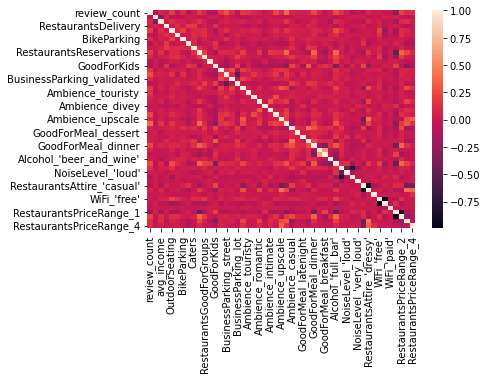

In [55]:
sns.heatmap(corr_matrix);

In [56]:
# Creating the Correlation matrix and Selecting the Upper trigular matrix:
upper_tri = abs_corr.where(np.triu(np.ones(abs_corr.shape),k=1).astype(np.bool))
print(upper_tri)

                            review_count  total_hh  avg_income  \
review_count                         NaN  0.057329    0.075943   
total_hh                             NaN       NaN    0.325941   
avg_income                           NaN       NaN         NaN   
RestaurantsDelivery                  NaN       NaN         NaN   
OutdoorSeating                       NaN       NaN         NaN   
BusinessAcceptsCreditCards           NaN       NaN         NaN   
BikeParking                          NaN       NaN         NaN   
RestaurantsTakeOut                   NaN       NaN         NaN   
Caters                               NaN       NaN         NaN   
RestaurantsReservations              NaN       NaN         NaN   
RestaurantsGoodForGroups             NaN       NaN         NaN   
HasTV                                NaN       NaN         NaN   
GoodForKids                          NaN       NaN         NaN   
BusinessParking_garage               NaN       NaN         NaN   
BusinessPa

/var/folders/ts/j11wcldj74b9cnvxcs3tnqvw0000gn/T/ipykernel_2058/3678837307.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = abs_corr.where(np.triu(np.ones(abs_corr.shape),k=1).astype(np.bool))


In [57]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print(); print(to_drop)


['GoodForMeal_breakfast', "NoiseLevel_'quiet'", "RestaurantsAttire_'dressy'", "WiFi_'no'", 'RestaurantsPriceRange_2']


In [58]:
businesses = businesses.drop(to_drop, axis=1) #drop high correlated columns

In [59]:
businesses

,business_id,business_name,city,state,postal_code,stars,categories,review_count,total_hh,avg_income,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsTakeOut,Caters,RestaurantsReservations,RestaurantsGoodForGroups,HasTV,GoodForKids,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,Ambience_touristy,Ambience_hipster,Ambience_romantic,Ambience_divey,Ambience_intimate,Ambience_trendy,Ambience_upscale,Ambience_classy,Ambience_casual,GoodForMeal_dessert,GoodForMeal_latenight,GoodForMeal_lunch,GoodForMeal_dinner,GoodForMeal_brunch,Alcohol_'beer_and_wine',Alcohol_'full_bar',NoiseLevel_'average',NoiseLevel_'loud',NoiseLevel_'very_loud',RestaurantsAttire_'casual',RestaurantsAttire_'formal',WiFi_'free',WiFi_'paid',RestaurantsPriceRange_1,RestaurantsPriceRange_3,RestaurantsPriceRange_4
0,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,Philadelphia,PA,19106,4.0,"Sushi Bars, Restaurants, Japanese",245,7625,162885,True,True,True,False,True,False,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,0,1,1,0,0,1,0,1,0,0,0,0
1,ROeacJQwBeh05Rqg7F6TCg,BAP,Philadelphia,PA,19147,4.5,"Korean, Restaurants",205,18239,128426,False,False,True,True,True,True,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,0,0,0,0,0,1,0,0,0,1,0,0
2,kV_Q1oqis8Qli8dUoGpTyQ,Ardmore Pizza,Ardmore,PA,19003,3.5,"Pizza, Restaurants",109,5665,135760,True,False,True,True,True,True,False,True,True,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,0,0,1,0,0,1,0,0,0,1,0,0
3,pJfh3Ct8iL58NZa8ta-a5w,Top Shelf Sports Lounge,Wesley Chapel,FL,33544,4.5,"Burgers, Sports Bars, Bars, Lounges, Restauran...",95,9689,109557,True,False,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,0,1,1,0,0,1,0,1,0,0,0,0
4,vje0KIiE7vtpx7JzmBx5LQ,The Pearl,Treasure Island,FL,33706,4.0,"Restaurants, French, Moroccan, Seafood, Medite...",129,8805,114601,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,0,1,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,0COlL5IKRu5sdWIsEiQAZg,Chick-fil-A,Glen Mills,PA,19342,3.0,"Caterers, Fast Food, Event Planning & Services...",52,8064,147032,True,True,True,True,True,True,False,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False,0,0,1,0,0,1,0,1,0,1,0,0
6261,Scd-rcsQCn60t1sHHFv-og,First Watch,St. Petersburg,FL,33709,3.5,"Cafes, Restaurants, Breakfast & Brunch, Americ...",183,10305,56349,True,True,True,True,True,True,False,True,True,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,0,0,1,0,0,1,0,1,0,0,0,0
6262,8MzF1Tlgz0pOkxmhP5dYzA,El Cap Restaurant,St. Petersburg,FL,33704,3.5,"American (Traditional), Burgers, Restaurants",414,8038,145715,False,True,True,True,True,False,False,True,True,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False,1,0,1,0,0,1,0,0,0,1,0,0
6263,N8fK2E6YNyo04DbVNvgIQw,Sage Mediterranean,Phoenixville,PA,19460,4.0,"Restaurants, Mediterranean",118,16443,139548,True,False,True,True,True,False,True,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,0,0,0,0,0,1,0,0,0,0,0,0


In [60]:
intDictionary = {True: 1, False: 0} #convert boolean values to binary values (0 and 1)
businesses = businesses.replace(intDictionary)

In [61]:
# save DF as csv:
businesses.to_csv('final_businesses.csv',index=False)

# write csv to json
with open('final_businesses.csv') as f:
    reader = csv.DictReader(f)
    rows = list(reader)

with open('final_businesses.json', 'w') as f: 
    json.dump(rows, f)